<center> # Naiwny klasyfikator bayesowski</center>

Celem ćwiczenia jest zapoznanie się z technikami konstrukcji naiwnego klasywikatora bayesowskiego. 

Ćwiczenie oparte jest o artykuł z [linku](https://www.kaggle.com/prashant111/naive-bayes-classifier-in-python/notebook)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import category_encoders as ce
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

Na początku proszę wczytać plik __data.csv__ używając jako separatora ',':

In [2]:
df = pd.read_csv('data.csv', sep=',')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


W następnie sprawdź które z kolumn zawierają dane tekstowe lub liczbowe. W tym celu sprawdź wartość  argumentu *dtype* z odpowiednim warunkiem:

In [3]:
categorical = df.dtypes[df.dtypes == 'object']
print('Dane tektowe zawierają kolumny :\n\n', categorical)

Dane tektowe zawierają kolumny :

 workclass         object
education         object
marital_status    object
occupation        object
relationship      object
race              object
sex               object
native_country    object
income            object
dtype: object


Sprawdź czy dane w kolumnach nie zawierają braków a jeżeli tak uzupełnij je według znanych Ci metod:

In [4]:
df = df.replace(' ?', np.NaN)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Na przygotowanych danych przeprowadź proces tworzenia zbiorów uczących i testowych, tak by klasyfikator rozpoznawał do której z grup w kolumnie 'income' należy opisywana osoba


In [5]:
X = df.drop(columns='income')
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

Przy pomocy biblioteki [category_encoders](https://contrib.scikit-learn.org/category_encoders/) przeprowadź proces kodowania zmiennych tektowych z pozostałych kategorii na wartości liczbowe:

In [6]:
encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)
X_train

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,fnlwgt,education_1,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15977,44,1,0,0,0,0,0,0,222978,1,...,0,0,0,0,0,0,0,0,0,0
13574,32,1,0,0,0,0,0,0,83253,0,...,0,0,0,0,0,0,0,0,0,0
23210,30,0,1,0,0,0,0,0,327825,1,...,0,0,0,0,0,0,0,0,0,0
9284,23,1,0,0,0,0,0,0,109952,0,...,0,0,0,0,0,0,0,0,0,0
8841,54,0,1,0,0,0,0,0,204325,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,66,0,1,0,0,0,0,0,376506,0,...,0,0,0,0,0,0,0,0,0,0
21206,50,1,0,0,0,0,0,0,158680,0,...,0,0,0,0,0,0,0,0,0,0
10646,50,1,0,0,0,0,0,0,72351,0,...,0,0,0,0,0,0,0,0,0,0
11687,49,0,0,1,0,0,0,0,263568,0,...,0,0,0,0,0,0,0,0,0,0


Używając [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) przeprowadź klasyfikację daych ze zbiorów testowych i treningowych. Podaj dokładnosć modelu i macierz błędu wraz z jej wykresem i interpretacją.

In [7]:
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb = gnb.fit(X_train, y_train)


In [8]:
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
print('Model accuracy_score: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.5f}'.format(gnb.score(X_test, y_test)))

Model accuracy_score: 0.78329
Training set score: 0.7925
Test set score: 0.78329


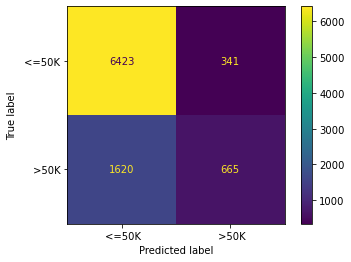

In [9]:
plot_confusion_matrix(gnb, X_test, y_test)

In [10]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.80      0.95      0.87      6764
        >50K       0.66      0.29      0.40      2285

    accuracy                           0.78      9049
   macro avg       0.73      0.62      0.64      9049
weighted avg       0.76      0.78      0.75      9049



Macierz konfuzji przedstawia wyniki predykcji oraz błędy. Przedstawia ona dane podzielone na cztery sektory - prawdziwie pozytywne, prawdziwie negatywne, fałszywie pozytywne oraz fałszywie negatywne. W powyższym modelu dokładność zestawu uczącego oraz testowego wynosi niecałe 80%. 

Przprowadź uczenie klasyfikatora dla kolumn *race* i *native_country*. Podaj dokładnosć modeli i macierze błędu wraz z ich wykresami i interpretacją. Przedstaw wnioski od czego zależą otrzymane wyniki

In [11]:
X = df[['race', 'native_country']]
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train

,race,native_country
15977,White,United-States
13574,White,United-States
23210,White,United-States
9284,White,United-States
8841,White,United-States
...,...,...
14169,White,United-States
21206,White,United-States
10646,White,United-States
11687,White,United-States


In [12]:
encoder = ce.OneHotEncoder(cols=['race','native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

X_train

,race_1,race_2,race_3,race_4,race_5,native_country_1,native_country_2,native_country_3,native_country_4,native_country_5,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
15977,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13574,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23210,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9284,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8841,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14169,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21206,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10646,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11687,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
# instantiate the model
gnb = GaussianNB()

# fit the model
gnb = gnb.fit(X_train, y_train)

In [14]:
y_pred = gnb.predict(X_test)
y_pred_train = gnb.predict(X_train)
print('Model accuracy_score: {0:0.5f}'. format(accuracy_score(y_test, y_pred)))
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))
print('Test set score: {:.5f}'.format(gnb.score(X_test, y_test)))

Model accuracy_score: 0.30169
Training set score: 0.2984
Test set score: 0.30169


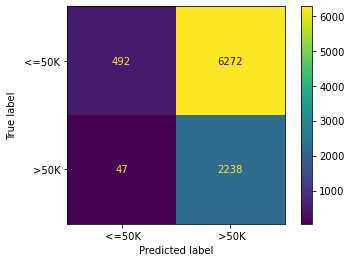

In [15]:
plot_confusion_matrix(gnb, X_test, y_test)

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       <=50K       0.91      0.07      0.13      6764
        >50K       0.26      0.98      0.41      2285

    accuracy                           0.30      9049
   macro avg       0.59      0.53      0.27      9049
weighted avg       0.75      0.30      0.21      9049



Powyższa predykcja daje znacznie gorsze wyniki w porównaniu do poprzedniej. Skuteczność uczenia jest na poziomie 30%. Z macierzy konfuzji możemy zauważyć przewagę wyników fałszywie pozytywnych. Na skuteczność predykcji bezpośredni wpływ ma zbyt mała ilość danych uczących.